In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics,tree
from sklearn.preprocessing import binarize, label_binarize
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
import itertools
from itertools import cycle
from functools import reduce
from pandas import DataFrame
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 310)


# Functions

In [103]:
# fitting the model and getting the predicted values from the model
# Will need to make this equal y_pred_'model_ran'
def fit_model(model_ran,X_train,y_train, X_test,y_test):
    model_ran.fit(X_train,y_train)
    return [model_ran.predict(X_test)]


# Run model for accuracy score, cross validation  avg accuracy score, precision score, recall score, and f1 score
def run_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    
    return [name,
            accuracy_score(y_test, y_prediction_of_a_model),
            cross_val_score(model_ran, X,y, cv=10).mean(),
            precision_score(y_test, y_prediction_of_a_model, average='weighted'),
            recall_score(y_test, y_prediction_of_a_model, average = 'weighted'),
            f1_score(y_test, y_prediction_of_a_model, average='weighted')]
    
    
# Print accuracy score, cross validation  avg accuracy score, precision score, recall score, and f1 score
def print_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    print(f'{name} Prediction accuracy is: {accuracy}\n {name} Mean cross validation is: {cross_val}\n  {name} Precision score is: {precision}\n   {name} Prediction recall score is: {recall}\n    {name} Prediction f1 score is: {f1}')



def pred_manual_data(model_ran, X,y, X2_manual):

    model_ran.fit(X, y)
    model_ran.y2_pred_X_manual = model_ran.predict(X2_manual)
    for x in model_ran.y2_pred_X_manual:
        if x == 3:
            print(f' The predicted class of the manually added X value is {model_ran.y2_pred_X_manual} or Highly Scored on Metacritic')
        elif x == 2:
            print(f' The predicted class of the manually added X value is {model_ran.y2_pred_X_manual} or Moderately Scored on Metacritic')
        else:
            print(f' The predicted class of the manually added X value is {model_ran.y2_pred_X_manual} or Poorly Scored on Metacritic')



In [104]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [7]:
#for roc auc score
def classify_binary(y, classes):
    y2_binary= label_binarize(y,  classes=[1,2,3])
    n_classes = y.shape[1]
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=3)


# Data import from made CSV files

In [8]:
data_le = pd.read_csv("DataFrames/data_le.csv")
data_le_dummy = pd.read_csv('DataFrames/data_le_dummy.csv')
data_original = pd.read_csv('DataFrames/data_original.csv')
data_le_nums = pd.read_csv('DataFrames/data_le_nums.csv')


In [9]:
data_le.describe(include = 'O').transpose()


count unique              top  freq
Name       4278   4278   Gears of War 2     1
Genre      4278     12           Action   839
Publisher  4278    247  Electronic Arts   386
Developer  4278   1185           Capcom    95
Rating     4278      5                T  1564
Platform   4278    417              PS2   597

# Correlation

In [10]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.000929  0.029022 -0.012915     0.036190   
NA_Sales               -0.000929  1.000000  0.881290  0.517311     0.737245   
EU_Sales                0.029022  0.881290  1.000000  0.581375     0.698873   
JP_Sales               -0.012915  0.517311  0.581375  1.000000     0.423651   
Other_Sales             0.036190  0.737245  0.698873  0.423651     1.000000   
Global_Sales            0.012059  0.963359  0.950841  0.663599     0.794199   
Critic_Score           -0.044566  0.213622  0.188398  0.181035     0.168064   
User_Score             -0.225902  0.086635  0.067766  0.143138     0.063834   
User_Count              0.174217  0.238617  0.239488  0.082902     0.217674   

                 Global_Sales  Critic_Score  User_Score  User_Count  
Year_of_Release      0.012059     -0.044566   -0.225902    0.174217  
NA_Sales             0.963359      0.213622    0.086635    0.238617  
EU_Sales             0.950841      0.188398    0.067766    0.239488  
JP_Sales             0.663599      0.181035    0.143138    0.082902  
Other_Sales          0.794199      0.168064    0.063834    0.217674  
Global_Sales         1.000000      0.218513    0.096269    0.238679  
Critic_Score         0.218513      1.000000    0.626585    0.266341  
User_Score           0.096269      0.626585    1.000000    0.041395  
User_Count           0.238679      0.266341    0.041395    1.000000

In [11]:
corr.describe(include="all")

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
count         9.000000  9.000000  9.000000  9.000000     9.000000   
mean          0.107464  0.515239  0.515228  0.397788     0.459970   
std           0.350339  0.393178  0.389925  0.328183     0.356904   
min          -0.225902 -0.000929  0.029022 -0.012915     0.036190   
25%          -0.012915  0.213622  0.188398  0.143138     0.168064   
50%           0.012059  0.517311  0.581375  0.423651     0.423651   
75%           0.036190  0.881290  0.881290  0.581375     0.737245   
max           1.000000  1.000000  1.000000  1.000000     1.000000   

       Global_Sales  Critic_Score  User_Score  User_Count  
count      9.000000      9.000000    9.000000    9.000000  
mean       0.548613      0.313110    0.211080    0.277701  
std        0.404447      0.310863    0.369170    0.281615  
min        0.012059     -0.044566   -0.225902    0.041395  
25%        0.218513      0.181035    0.063834    0.174217  
50%        0.663599      0.213622    0.086635    0.238617  
75%        0.950841      0.266341    0.143138    0.239488  
max        1.000000      1.000000    1.000000    1.000000

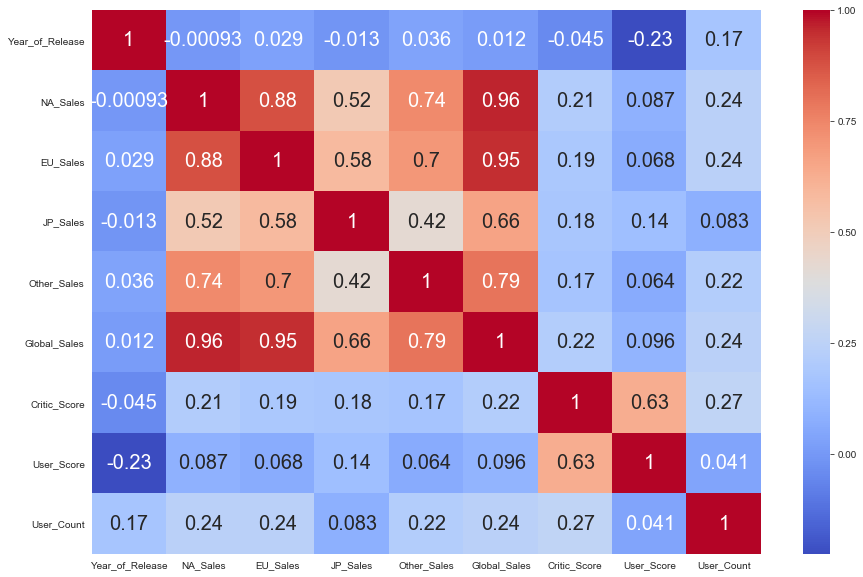

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='coolwarm')


## OLM

### OLM for Global_Sales~NA_Sales

In [13]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~NA_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 5.516e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:28:23   Log-Likelihood:                -3978.4
No. Observations:                4278   AIC:                             7961.
Df Residuals:                    4276   BIC:                             7974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0097      0.010      0.976      0.329      -0.010       0.029
NA_Sales       1.9827      0.008    234.868      0.000       1.966       1.999
==============================================================================
Omnibus:                     4080.392   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886730.597
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      73.077   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for Critic_Score~Global_Sales

In [14]:
abs(corr).sort_values(by = 'Critic_Score',  ascending= False)['Critic_Score']
data_reg_simple = ols(formula= "Critic_Score~Global_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     214.4
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           2.07e-47
Time:                        19:28:24   Log-Likelihood:                -17313.
No. Observations:                4278   AIC:                         3.463e+04
Df Residuals:                    4276   BIC:                         3.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.4428      0.224    305.238      0.000      68.003      68.882
Global_Sales     1.3560      0.093     14.643      0.000       1.174       1.538
==============================================================================
Omnibus:                      553.181   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.284
Skew:                          -0.913   Prob(JB):                    9.43e-188
Kurtosis:                       4.224   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking the relationships between the different categories

Visualizing relationship with each column of my dataset

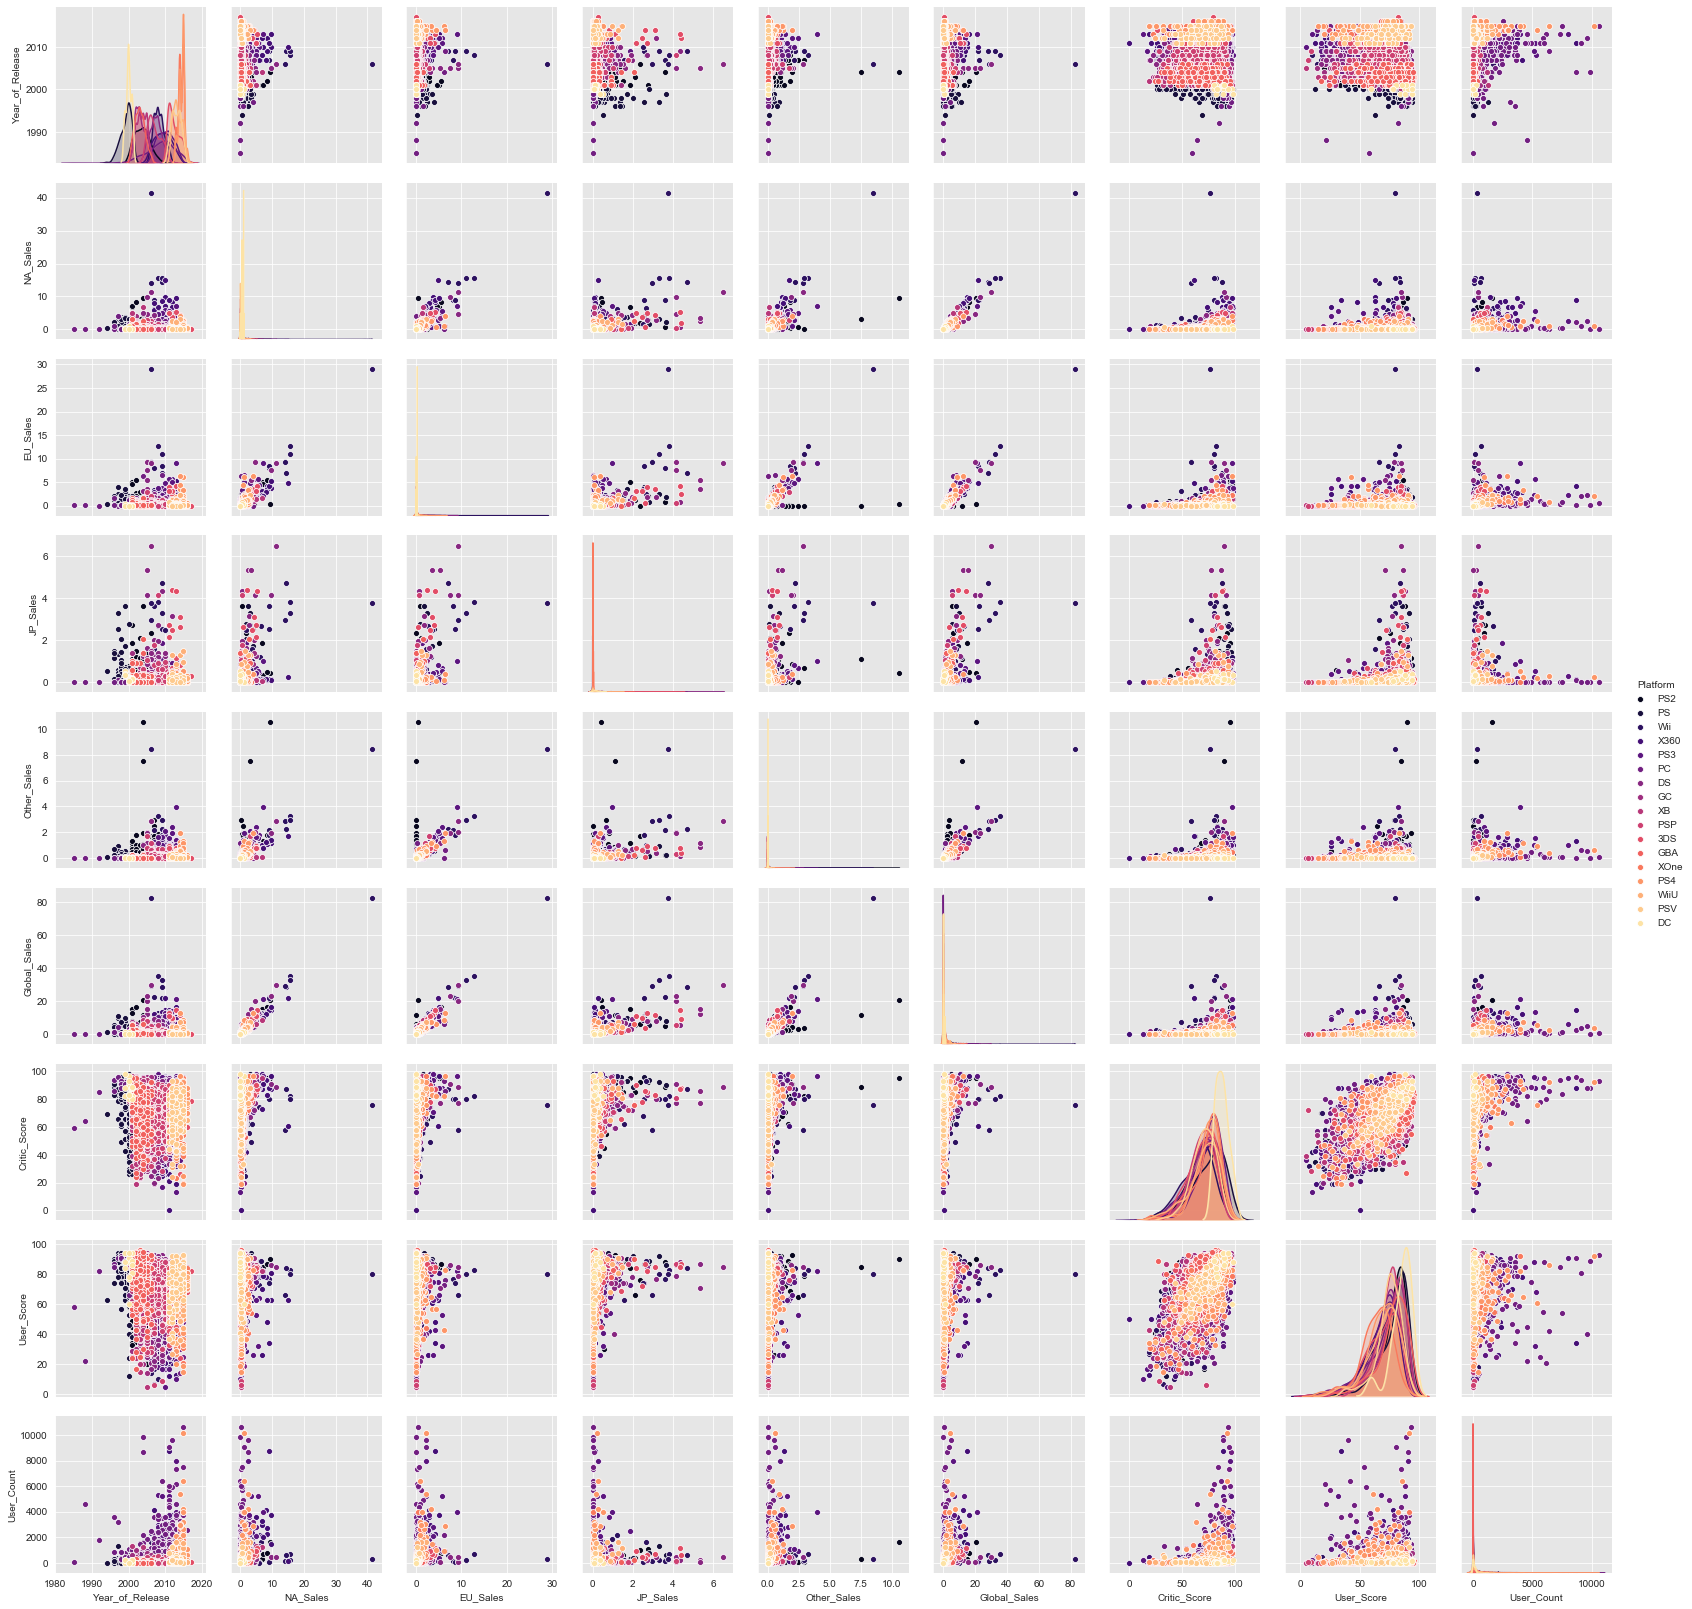

In [15]:
sns.pairplot(data_original, hue ='Platform', palette ='magma')

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



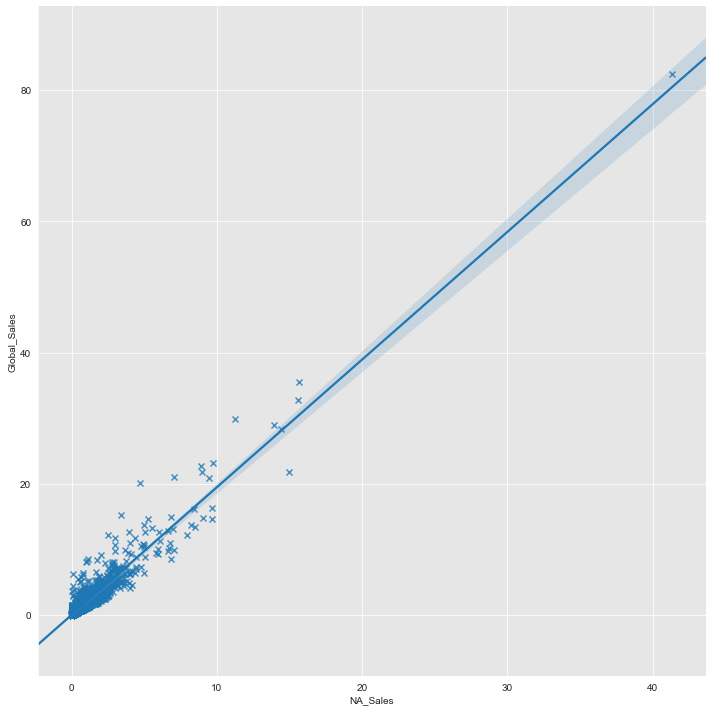

In [16]:

sns.lmplot(x='NA_Sales', y='Global_Sales', data= data_original, markers=[ "x"], fit_reg =True,size = 10)


//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



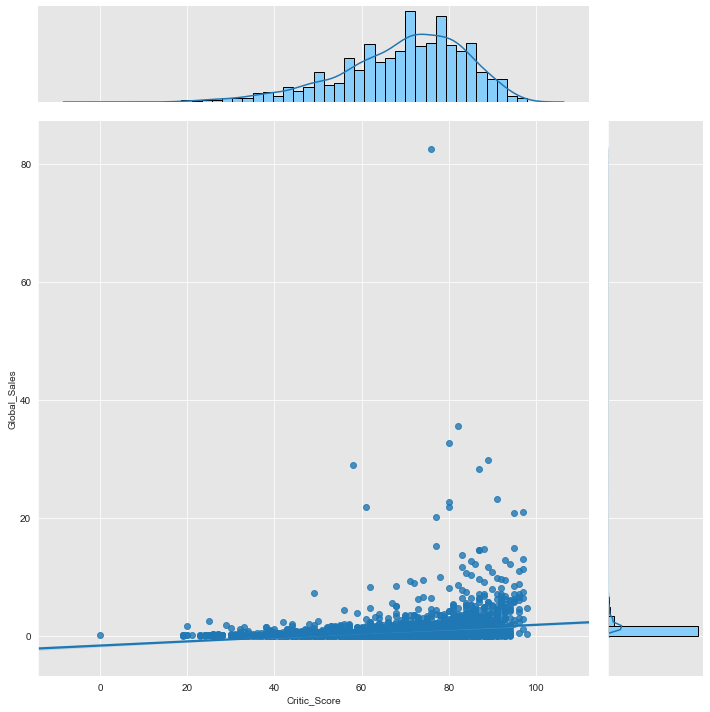

In [17]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



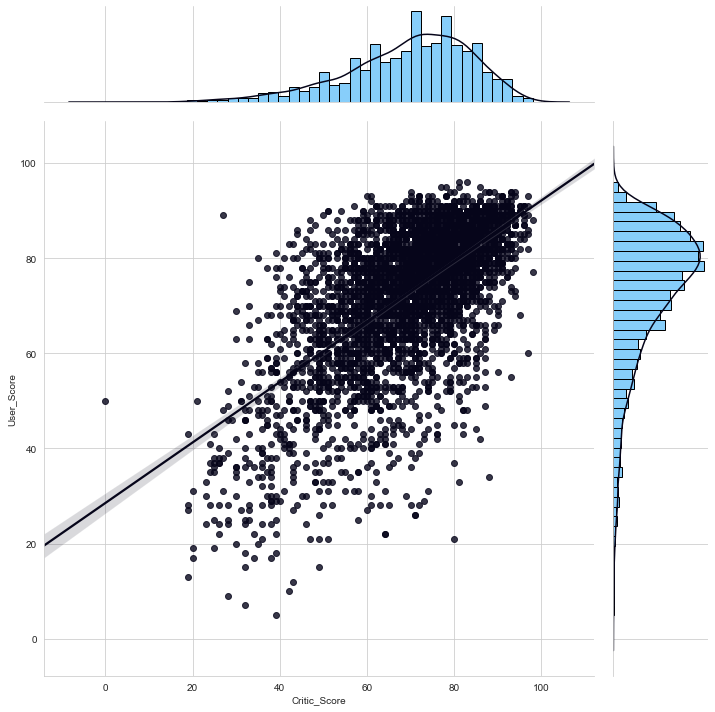

In [44]:
sns.jointplot(x="Critic_Score", y="User_Score", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

Box plot of the relationship for type against rank and score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

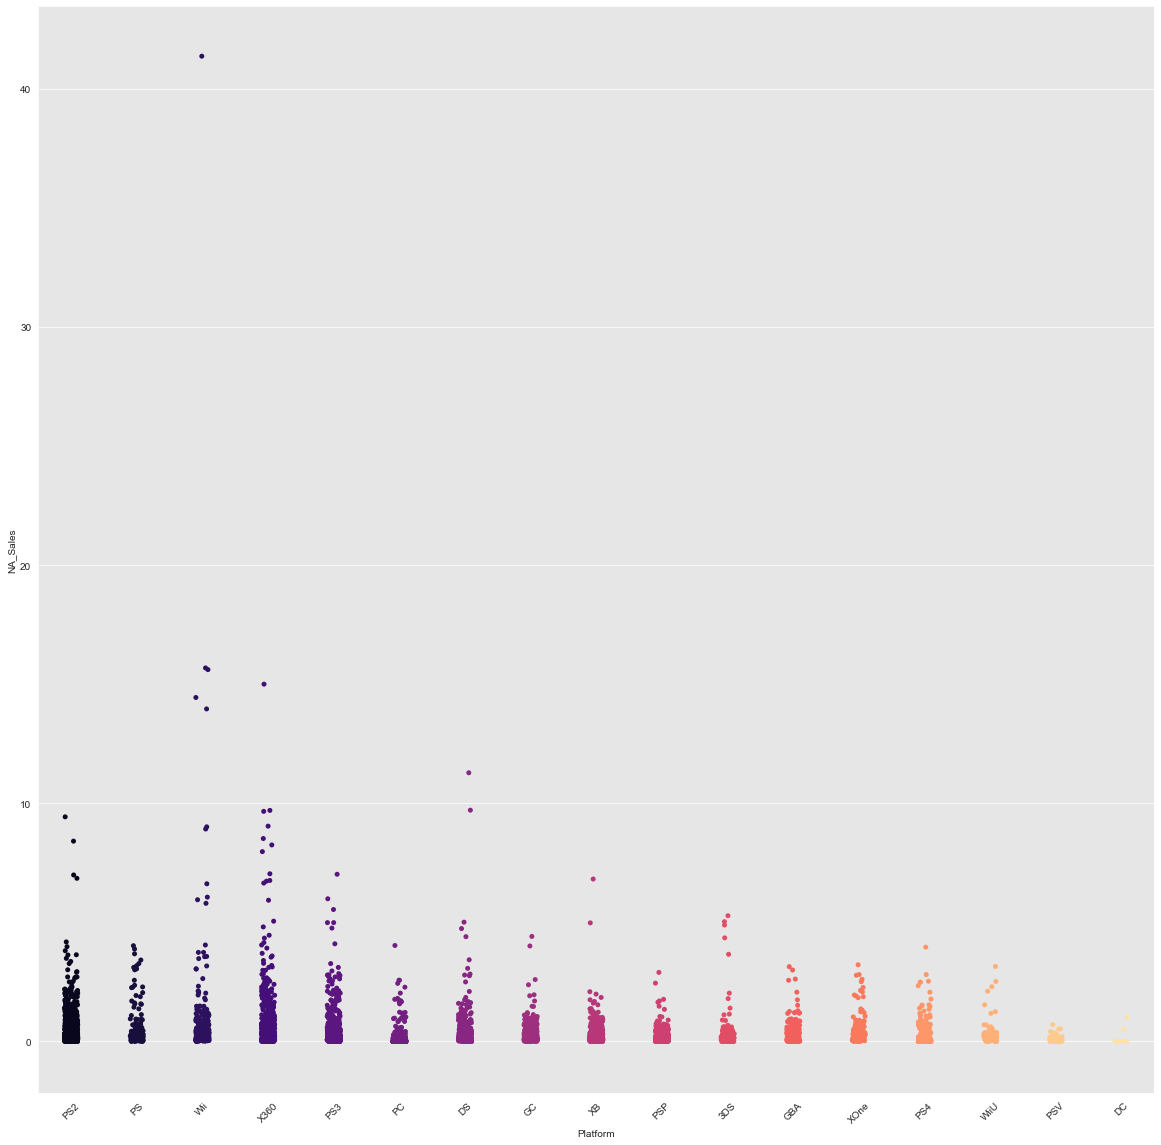

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
sns.stripplot(data=data_original, x='Platform',y= 'NA_Sales' , orient='v', palette ='magma')
# plt.gca().invert_yaxis()
plt.ylim()
plt.xticks(rotation=45)

(0, 17.5)

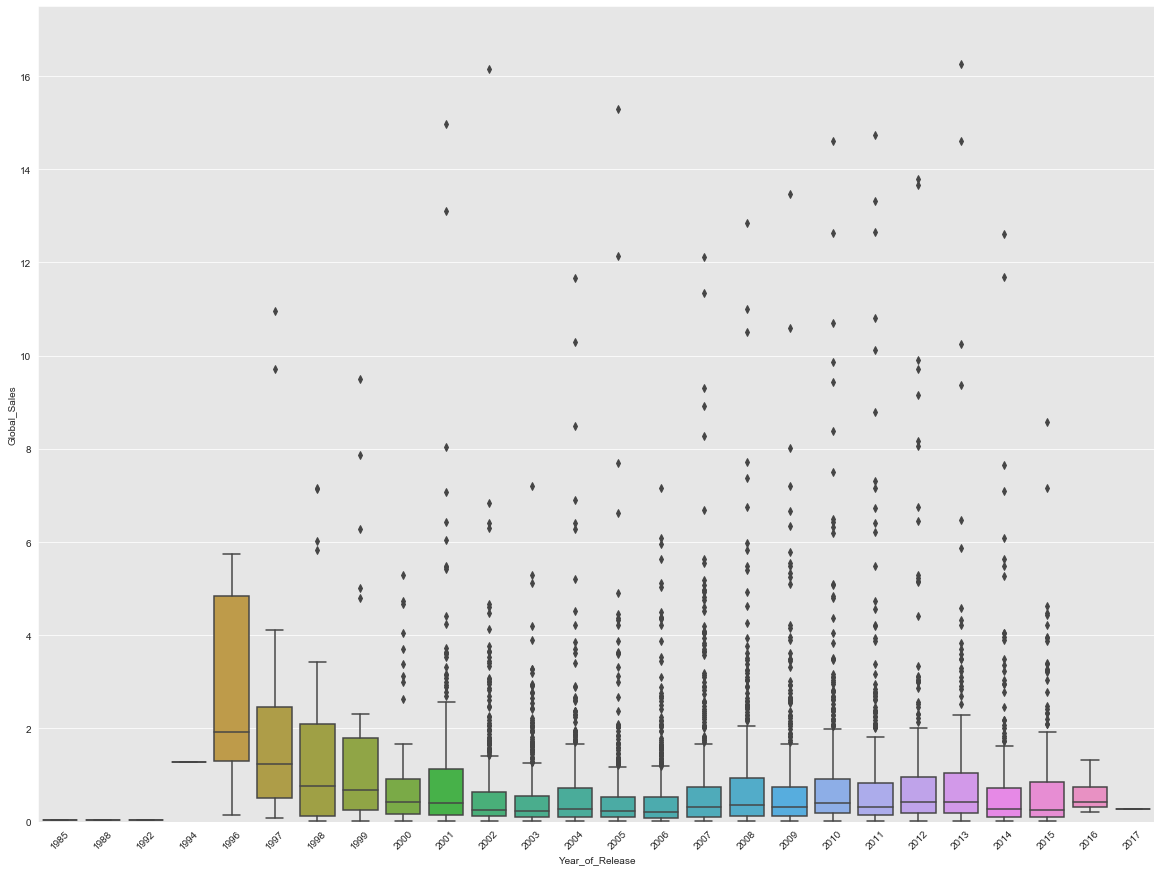

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data_original, x='Year_of_Release' ,y= 'Global_Sales', orient='v', )
plt.xticks(rotation=45)
# had to limit y axis the graph was very small (one outlier on 2006 @ 8.2 million not shown)
plt.ylim(0,17.5) 

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

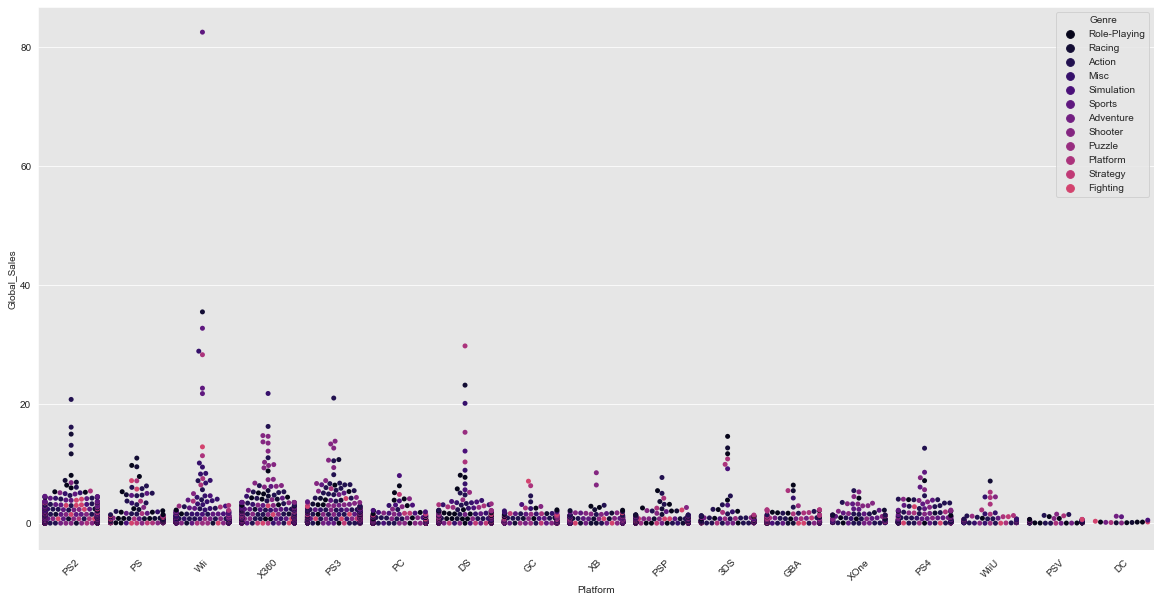

In [25]:
sns.set_palette("magma", 20)
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_original, x='Platform', y= 'Global_Sales', size=5, hue='Genre',cmap='ReW')
plt.xticks(rotation =45)


([<matplotlib.axis.XTick at 0x1c28f87b00>,
 <a list of 2 Text xticklabel objects>)

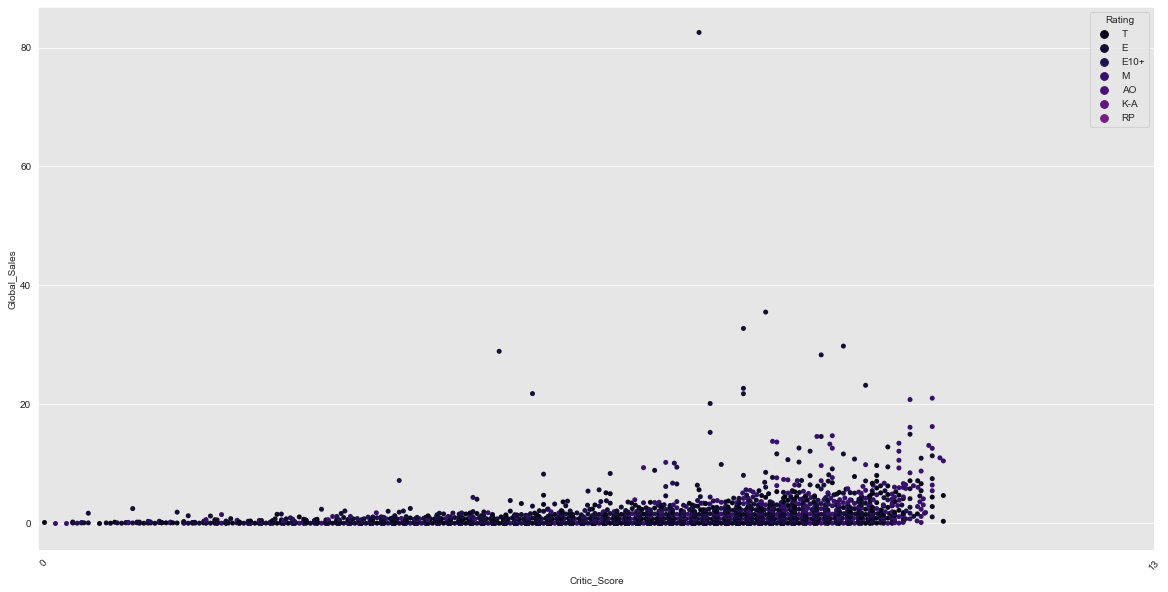

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_original, x='Critic_Score', y= 'Global_Sales', size=5, hue='Rating', cmap='reds' )
plt.xticks((0,100),rotation =45)


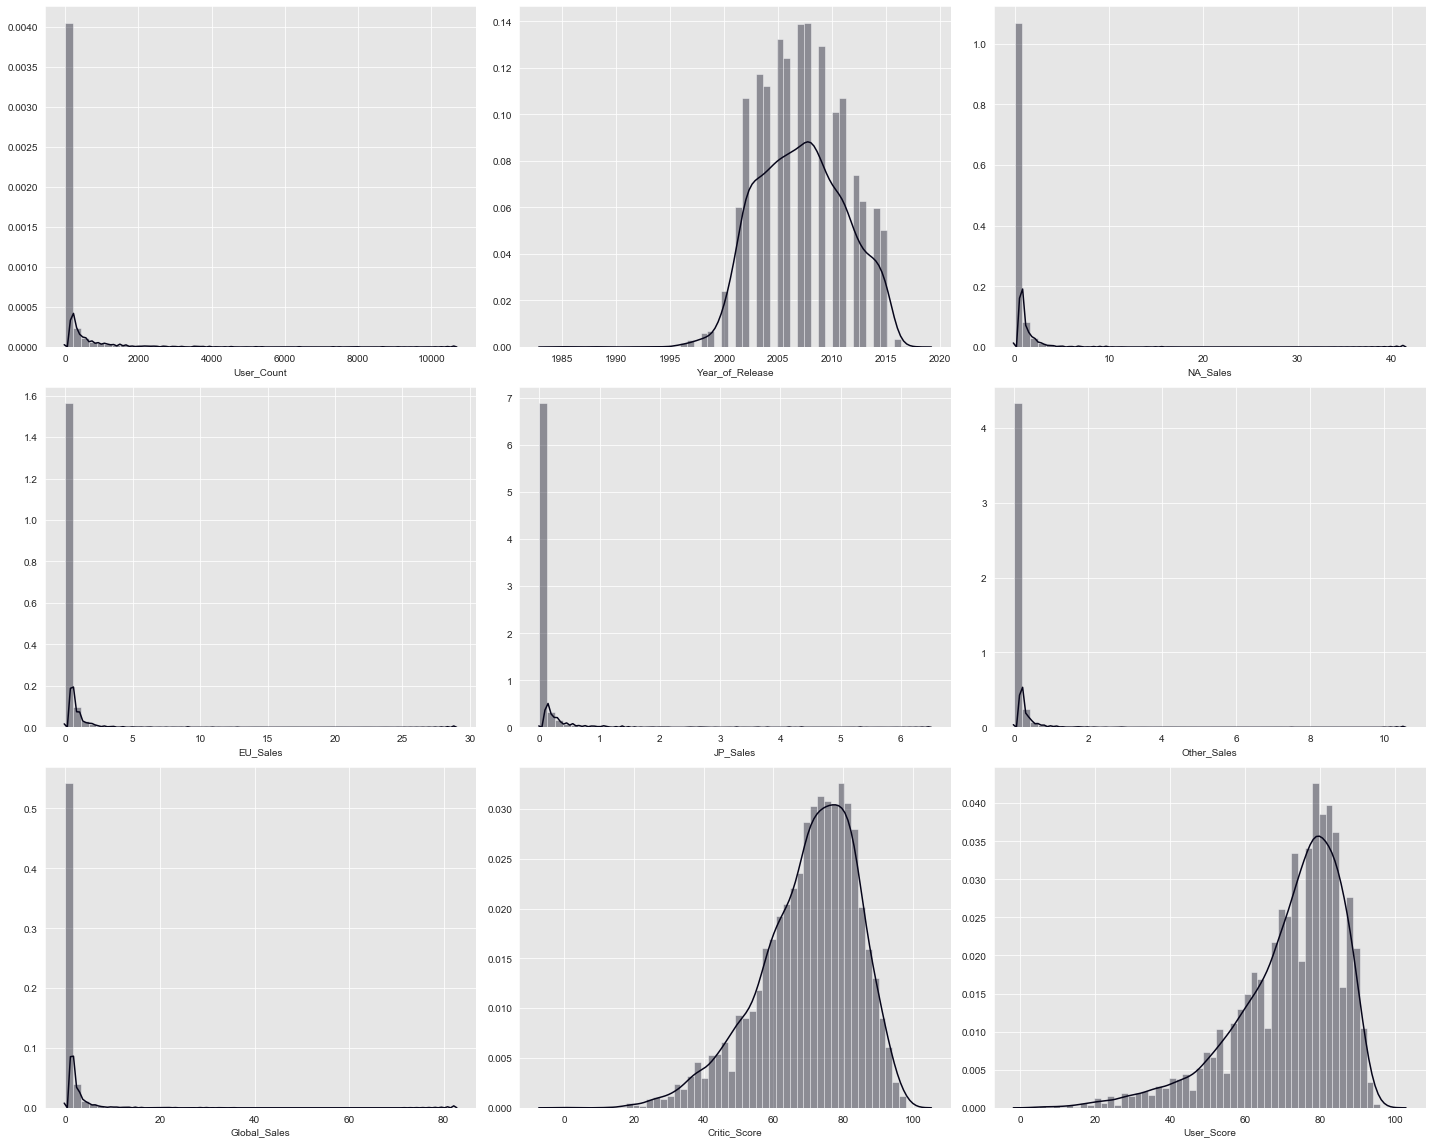

In [28]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_le_nums.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_le_nums[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

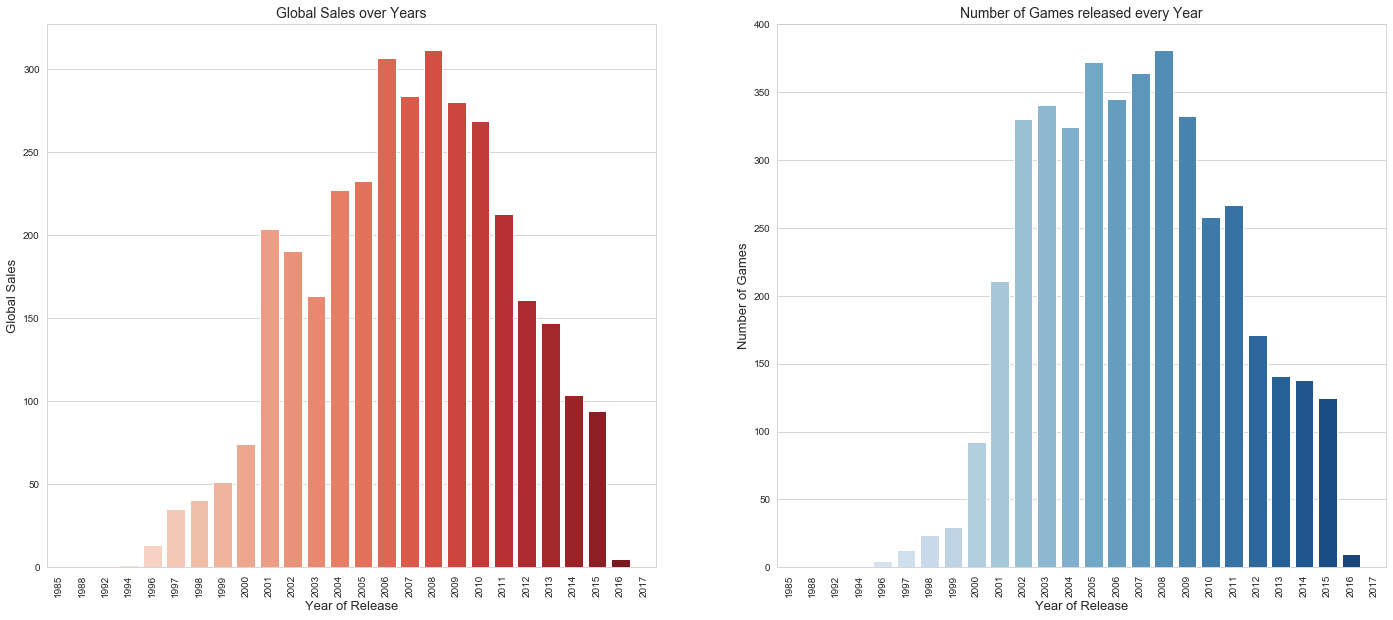

In [29]:
fig=plt.figure(figsize=(24,10))
plt.subplots_adjust(left=None, wspace=None, hspace=None)
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
plt.title('Global Sales over Years',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x='Year_of_Release',y='Global_Sales',data=data_le.groupby(data_le['Year_of_Release'].sort_values()).sum().Global_Sales.reset_index(),palette='Reds')
plt.ylabel('Global Sales',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13})

plt.subplot(1, 2, 2)
plt.title('Number of Games released every Year',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x=data_le.Year_of_Release.value_counts().index, y=data_le.Year_of_Release.value_counts(),palette='Blues');
plt.ylabel('Number of Games',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13});

# Avg Sales against Consoles

In [30]:
NA_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend=dict(x=0.77, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor='light grey',
            xaxis=dict(title="Platform",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis=dict(title='Avg Sales (in Millions)',gridcolor="#DCDCDC"),
            title="Avg Sales from Different Markets and Consoles")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)


# Avg Sales against Genres

In [18]:
NA_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend = dict(x=0.8, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor ='light grey',
            xaxis = dict(title="Genre",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis = dict(title='Avg Sales (in Millions)',gridcolor="#DCDCDC"),
            title ="Avg Sales from Different Markets and Genres")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)




In [19]:
data_le['Global_Sales'].describe()

count    4278.000000
mean        0.796515
std         2.286723
min         0.010000
25%         0.100000
50%         0.260000
75%         0.700000
max        82.530000
Name: Global_Sales, dtype: float64

In [20]:
data_le_sales_clas = data_original.copy(deep=True)
data_le_sales_clas['Sold_Classification'] = [3 if x  >= 7.5 else 1  if x  <= 2.0 else 2 for x in data_original['Global_Sales']]

glob_high_genre = data_le_sales_clas.groupby(['Genre','Sold_Classification']).Platform.count().unstack()
print(data_le_sales_clas.groupby(['Sold_Classification','Genre']).Global_Sales.count().unstack())

Genre                Action  Adventure  Fighting   Misc  Platform  Puzzle  \
Sold_Classification                                                         
1                    1445.0      229.0     346.0  330.0     357.0   107.0   
2                     119.0        6.0      22.0   42.0      30.0    10.0   
3                      10.0        NaN       1.0    8.0       7.0     1.0   

Genre                Racing  Role-Playing  Shooter  Simulation  Sports  \
Sold_Classification                                                      
1                     524.0         634.0    742.0       269.0   844.0   
2                      37.0          56.0     73.0        19.0    74.0   
3                       8.0           8.0     16.0         3.0     5.0   

Genre                Strategy  
Sold_Classification            
1                       260.0  
2                         2.0  
3                         NaN  


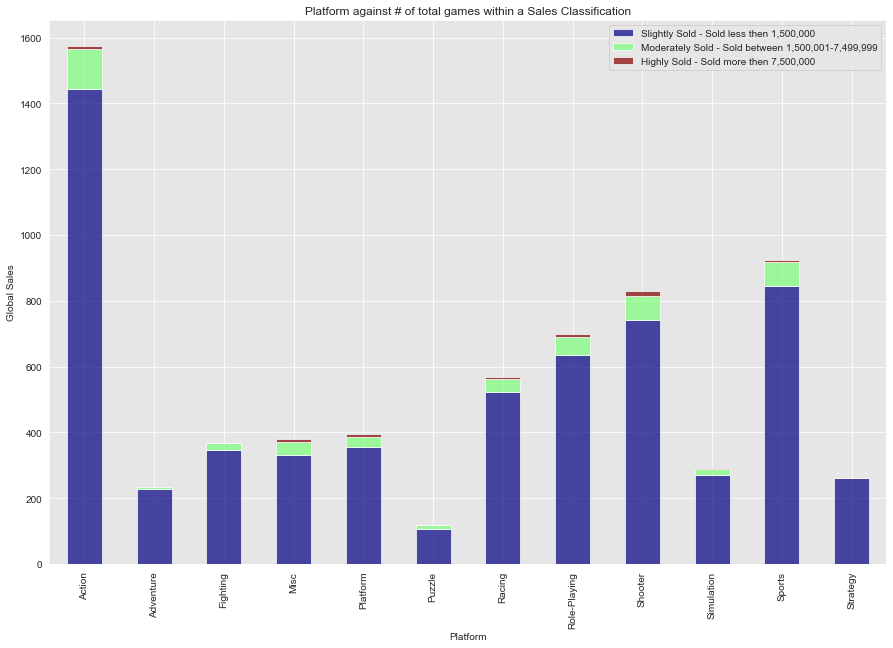

In [21]:
p3 = glob_high_genre.plot(kind = 'bar', stacked = True,
                    alpha = .70, cmap='jet',figsize=(15,10))
p3.set_title('Platform against # of total games within a Sales Classification')
p3.set_xlabel('Platform')
p3.set_ylabel('Global Sales')
p3.legend(['Slightly Sold - Sold less then 1,500,000', 'Moderately Sold - Sold between 1,500,001-7,499,999','Highly Sold - Sold more then 7,500,000'])
plt.show()

Critic Score Classification

Platform                      3DS    DC     DS    GBA     GC     PC    PS  \
Critic_Score_Classification                                                 
1                             1.0   NaN   28.0   11.0   15.0    6.0   9.0   
2                            97.0   NaN  284.0  110.0  177.0  232.0  57.0   
3                            52.0  14.0  154.0  116.0  156.0  381.0  84.0   

Platform                       PS2    PS3   PS4    PSP   PSV    Wii  WiiU  \
Critic_Score_Classification                                                 
1                             29.0   22.0   4.0    6.0   1.0   36.0   4.0   
2                            671.0  390.0  72.0  258.0  63.0  321.0  39.0   
3                            441.0  360.0  79.0  126.0  44.0  122.0  40.0   

Platform                      X360     XB  XOne  
Critic_Score_Classification                      
1                             49.0   20.0   4.0  
2                            440.0  278.0  40.0  
3                           

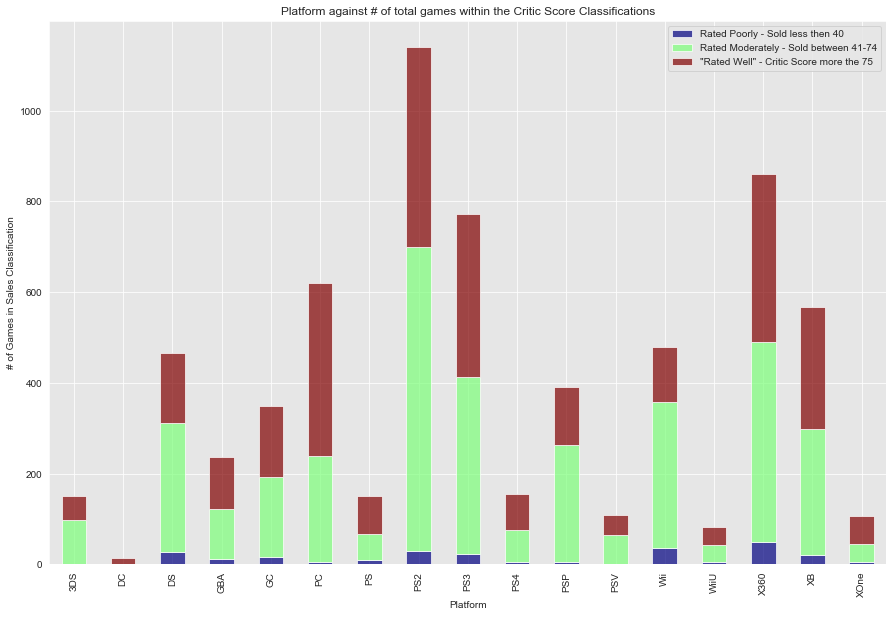

In [22]:
data_le_crit_clas = data_original.copy(deep=True)
data_le_crit_clas['Critic_Score_Classification'] = [3 if x  >= 75 else 1  if x  <= 40 else 2 for x in data_original['Critic_Score']]


crit_clas_plat = data_le_crit_clas.groupby(['Platform','Critic_Score_Classification']).Critic_Score_Classification.count().unstack()
# print(data_le_sales_clas.groupby(['Sold_Classification','Genre']).Global_Sales.count().unstack())
print(data_le_crit_clas.groupby(['Critic_Score_Classification','Platform']).Critic_Score.count().unstack())

p2 = crit_clas_plat.plot(kind = 'bar', stacked = True,
                    alpha = .70, cmap='jet',figsize=(15,10))
p2.set_title('Platform against # of total games within the Critic Score Classifications')
p2.set_xlabel('Platform')
p2.set_ylabel('# of Games in Sales Classification')
p2.legend(['Rated Poorly - Sold less then 40', 'Rated Moderately - Sold between 41-74','"Rated Well" - Critic Score more the 75'])
plt.show()

# Classification Modeling

## Setup for the Classifying

In [23]:
data_dummy_sales_clas = data_le_dummy.copy()
data_dummy_crit_scor_clas = data_le_dummy.copy()

In [24]:
# separate global sales into 3 groups  {Slightly Sold = Global Sales @ 1,500,000 or less; Moderately Sold = Global Sales @ 1500,001-7,499,999; Highly Sold = Global Sales @ 7,500,000 or more}
data_dummy_sales_clas['Sold_Classification'] = data_le_dummy['Sold_Classification'] = ['Highly Sold' if x  >= 7.5 else "Slightly Sold"  if x  <= 1.5 else 'Moderately Sold' for x in data_le_dummy['Global_Sales']]


In [25]:
# separated Critic Score into 3 groups  {1 = score @ 50 or less; 2 = score @ 51-74; 3 = score @ 75 or more}

#Avg Critic_score is 72.768

data_dummy_crit_scor_clas['Critic_Score_Classification'] = data_le_dummy['Critic_Score_Classification'] = [3 if x  >= 75 else 1  if x  <= 40 else 2 for x in data_le_dummy['Critic_Score']]



In [35]:
# data_le_dummy = data_le_dummy.drop(columns=['Critic_Score_Classification', 'Sold_Classification'])
# data_le_dummy.head(3)

## Classification for Global Sales

In [319]:


X = data_dummy_sales_clas.drop(['Sold_Classification'
                                ,'Name'
                                ,'3DO'
                                , 'ASCII Entertainment'
                                , 'Acquire'
                                , 'Atlus'
                                , 'Deep Silver'
                                , 'Eidos Interactive'
                                , 'Encore'
                                , 'Enix Corporation'
                                , 'From Software'
                                , 'GT Interactive'
                                , 'Game Factory'
                                , 'Global Star'
                                , 'Hudson Soft'
                                , 'Level 5'
                                , 'Myelin Media'
                                , 'Namco Bandai Games'
                                , 'NewKidCo'
                                , 'Nintendo'
                                , 'Pacific Century Cyber Works'
                                , 'Pinnacle'
                                , 'SCi'
                                , 'Square'
                                , 'Strategy'
                                , 'System 3 Arcade Software'
                                , 'TDK Mediactive'
                                , ' Inc'
                                , 'AQ Interactive'
                                , 'Activision'
                                , 'Agatsuma Entertainment'
                                , 'Bigben Interactive'
                                , 'ESP'
                                , 'Focus Home Interactive'
                                , 'Funbox Media'
                                , 'Funcom'
                                , 'Ghostlight'
                                , 'GungHo'
                                , 'Gust'
                                , 'Human Entertainment'
                                , 'Kadokawa Shoten'
                                , 'Mercury Games'
                                , 'Paradox Interactive'
                                , 'Play It'
                                , 'Popcorn Arcade'
                                , 'RTL'
                                , 'Scholastic Inc.'
                                , 'Sony Computer Entertainment'
                                , 'Swing! Entertainment'
                                , 'Titus'
                                , 'Virgin Interactive'
                                , 'Visco'], axis = 1)
y = data_dummy_sales_clas['Sold_Classification']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

print(f'{X.shape},\n {y.shape} ')

(4278, 237),
 (4278,) 


In [ ]:
# for feature in sorted(zip(rf.feature_importances_, list(X_train.columns))):
#     print(feature)

### Logistic Regression Model

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

logreg_accuracy_train = logreg.score(X_train ,y_train)
logreg_accuracy_test = logreg.score(X_test,y_test)

# Cross Validation - Logistic Regression

logreg_cross_val_score = cross_val_score(logreg, X,y, cv=10)
logreg_cv_score_avg = logreg_cross_val_score.mean()
cv_pred_logreg = cross_val_predict(logreg, X_test, y_test, cv=10)

print(f'Logistic Regression train accuracy is {logreg_accuracy_train}\nLogistic Regression test accuracy is {logreg_accuracy_test}\nMean Cross Validation logreg Regression is: {logreg_cv_score_avg}')
logreg_evalution = run_model('Logistic Regression', logreg,X,y,y_test,y_pred_logreg)
print_model('Logistic Regression', logreg,X,y,y_test,y_pred_logreg)

Logistic Regression train accuracy is 0.9799599198396793
Logistic Regression test accuracy is 0.9789719626168224
Mean Cross Validation logreg Regression is: 0.9787349530608301
Logistic Regression Prediction accuracy is: 0.9789719626168224
 Logistic Regression Mean cross validation is: 0.9787349530608301
  Logistic Regression Precision score is: 0.9790591431641615
   Logistic Regression Prediction recall score is: 0.9789719626168224
    Logistic Regression Prediction f1 score is: 0.9780140956526899


### KNN Model - Best Preformming Model 

In [79]:
# K_nearest Neighbor = 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_test, y_test)
y_pred_knn5 = knn5.predict(X_test)


# K_nearest Neighbor = 3 
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_test, y_test)
y_pred_knn3 = knn3.predict(X_test)


# Testing Accuracy
knn5_accuracy_train = knn5.score(X_train,y_train)
knn5_accuracy_test = knn5.score(X_test,y_test)

knn3_accuracy_train = knn3.score(X_train,y_train)
knn3_accuracy_test = knn3.score(X_test,y_test)

# Printing Accuracy
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test}')
knn5_evalution = run_model('K_nearest Neighbor = 5', knn5,X,y,y_test,y_pred_knn5)
print_model("K_nearest Neighbor = 5", knn5,X,y,y_test,y_pred_knn5)


print(f'\n\nK_nearest Neighbor = 3 Regression train accuracy is {knn3_accuracy_train}\nK_nearest Neighbor = 3 Regression test accuracy is {knn3_accuracy_test2}')
knn3_evalution = run_model('K_nearest Neighbor = 3', knn3,X2,y2,y2_test,y2_pred_knn3)
print_model("K_nearest Neighbor = 3", knn3,X,y,y_test,y_pred_knn3)



y_predict_proba_knn5 = knn5.predict_proba(X_test)

K_nearest Neighbor = 5 Regression train accuracy is 0.8724114896459586
K_nearest Neighbor = 5 Regression test accuracy is 0.9096573208722741
K_nearest Neighbor = 5 Prediction accuracy is: 0.9096573208722741
 K_nearest Neighbor = 5 Mean cross validation is: 0.8798579771691462
  K_nearest Neighbor = 5 Precision score is: 0.8945454362846376
   K_nearest Neighbor = 5 Prediction recall score is: 0.9096573208722741
    K_nearest Neighbor = 5 Prediction f1 score is: 0.8958172076736874


K_nearest Neighbor = 3 Regression train accuracy is 0.8657314629258517
K_nearest Neighbor = 3 Regression test accuracy is 0.8255451713395638
K_nearest Neighbor = 3 Prediction accuracy is: 0.9236760124610592
 K_nearest Neighbor = 3 Mean cross validation is: 0.8768227622946483
  K_nearest Neighbor = 3 Precision score is: 0.9151083830837996
   K_nearest Neighbor = 3 Prediction recall score is: 0.9236760124610592
    K_nearest Neighbor = 3 Prediction f1 score is: 0.9144132363937842


Confusion Matrix

[[   5    7    4]
 [   1   45   85]
 [   2   17 1118]]
                 precision    recall  f1-score   support

    Highly Sold       0.62      0.31      0.42        16
Moderately Sold       0.65      0.34      0.45       131
  Slightly Sold       0.93      0.98      0.95      1137

       accuracy                           0.91      1284
      macro avg       0.73      0.55      0.61      1284
   weighted avg       0.89      0.91      0.90      1284

Confusion Matrix, without normalization
[[   5    7    4]
 [   1   45   85]
 [   2   17 1118]]


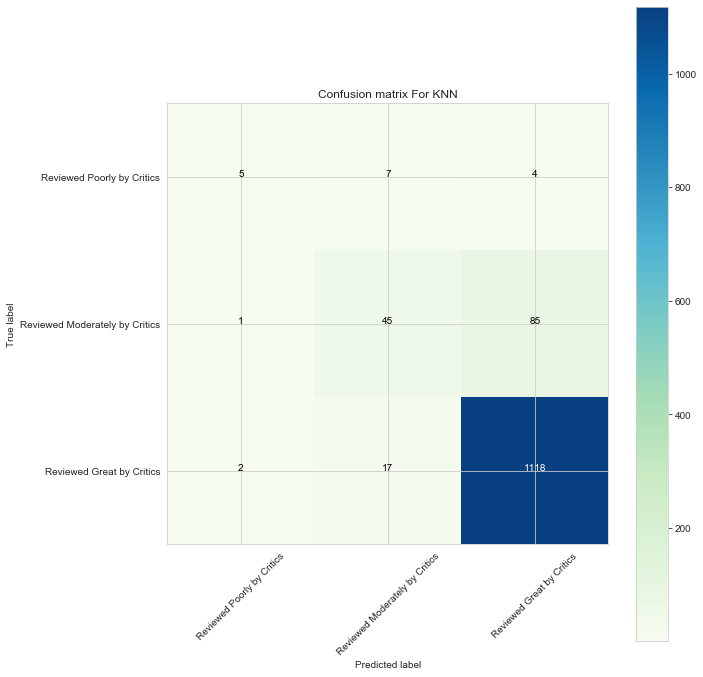

In [80]:
print(confusion_matrix(y_test, y_pred_knn5))
print(classification_report(y_test, y_pred_knn5))


cm = confusion_matrix(y_test,y_pred_knn5)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix For KNN',
                          cmap=plt.cm.GnBu)

In [81]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_knn3[0:25])
print(f'Accurary from 1st 25 values is {(22/25)*100}%')

True: ['Slightly Sold' 'Slightly Sold' 'Moderately Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Moderately Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold']
Pred: ['Slightly Sold' 'Slightly Sold' 'Moderately Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Moderately Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold']
Accurary from 1st 25 values is 88.0%


### Support Vector Classification

In [82]:
# Support Vector Classification
svc = svm.SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)
y_pred_svc = svc.predict(X_test)

svc_accuracy_train = svc.score(X_train,y_train)
svc_accuracy_test = svc.score(X_test,y_test)


print(f'Support Vector Classification train accuracy is {svc_accuracy_train}\nSupport Vector Classification test accuracy is {svc_accuracy_test}')

svc_evalution = run_model('Support Vector Classification', svc,X,y,y_test,y_pred_svc)
print_model("Support Vector Classification", svc,X,y,y_test,y_pred_svc)

Support Vector Classification train accuracy is 0.9315297261189045
Support Vector Classification test accuracy is 0.8894080996884736


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



Support Vector Classification Prediction accuracy is: 0.8894080996884736
 Support Vector Classification Mean cross validation is: 0.8880268510918121
  Support Vector Classification Precision score is: 0.8471318531495352
   Support Vector Classification Prediction recall score is: 0.8894080996884736
    Support Vector Classification Prediction f1 score is: 0.851516112870707


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



Confusion Matrix

[[   0    4   12]
 [   0   13  118]
 [   0    8 1129]]
                 precision    recall  f1-score   support

    Highly Sold       0.00      0.00      0.00        16
Moderately Sold       0.52      0.10      0.17       131
  Slightly Sold       0.90      0.99      0.94      1137

       accuracy                           0.89      1284
      macro avg       0.47      0.36      0.37      1284
   weighted avg       0.85      0.89      0.85      1284

Confusion Matrix, without normalization
[[   0    4   12]
 [   0   13  118]
 [   0    8 1129]]


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



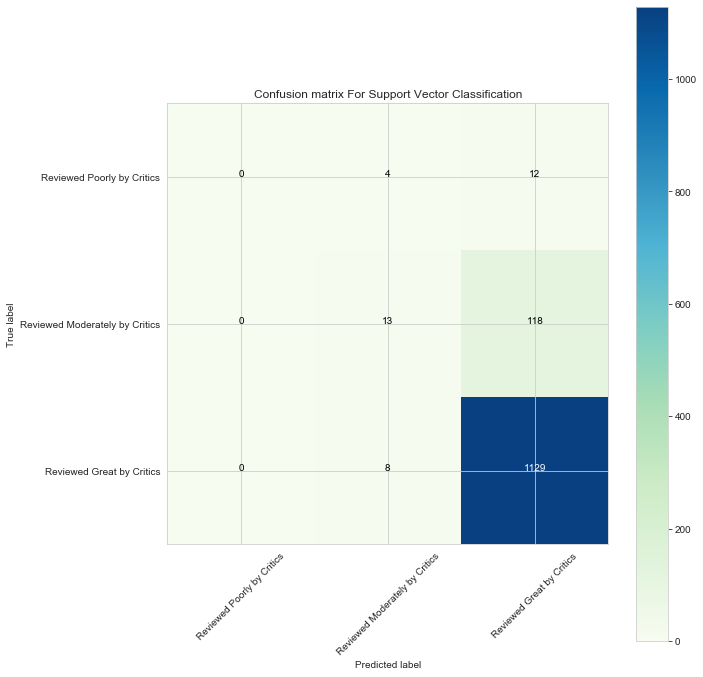

In [83]:
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

cm4 = confusion_matrix(y_test,y_pred_svc)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm4, classes,
                          normalize=False,
                          title='Confusion matrix For Support Vector Classification',
                          cmap=plt.cm.GnBu)

In [84]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_svc[0:25])
print(f'Support Vector Classification Accurary from 1st 25 values is {(20/25)*100}%')

True: ['Slightly Sold' 'Slightly Sold' 'Moderately Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Moderately Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold']
Pred: ['Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Slightly Sold'
 'Slightly Sold' 'Slightly Sold' 'Slightly Sold' 'Moderately Sold'
 'Slightly Sold']
Support Vector Classification Accurary from 1st 25 values is 80.0%
